<a href="https://colab.research.google.com/github/Rishi-128/ml4sci-anomaly-detection-dqm/blob/main/05_continuous_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In real detector systems, data distributions change over time due to evolving experimental conditions.
A static machine learning model trained once may gradually degrade in performance.
To address this, we simulate a simple continuous learning setup where the autoencoder is periodically
updated using recent data to adapt to data drift.


In [1]:

import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt


In [2]:
class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, input_dim)
        )

    def forward(self, x):
        return self.decoder(self.encoder(x))


In [3]:
input_dim = 10
model = Autoencoder(input_dim)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.MSELoss()


In [8]:
errors = []

for t in range(15):
    drifted_data = np.random.normal(loc=0.2 * t, scale=1.0, size=(500, input_dim))
    drifted_tensor = torch.tensor(drifted_data, dtype=torch.float32)

    # Evaluate before update
    with torch.no_grad():
        recon = model(drifted_tensor)
        error = criterion(recon, drifted_tensor).item()
        errors.append(error)

    # 🔁 Continuous learning step
    model.train()
    for _ in range(5):  # small continuous retraining
      optimizer.zero_grad()
      recon = model(drifted_tensor)
      loss = criterion(recon, drifted_tensor)
      loss.backward()
      optimizer.step()



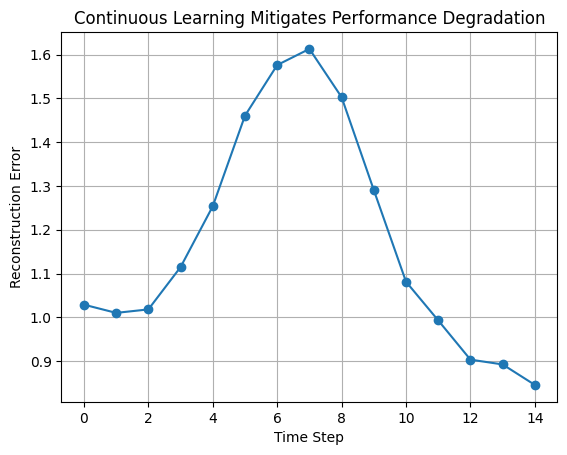

In [9]:
plt.plot(errors, marker='o')
plt.xlabel("Time Step")
plt.ylabel("Reconstruction Error")
plt.title("Continuous Learning Mitigates Performance Degradation")
plt.grid(True)
plt.show()


### Result

Unlike the static model, the continuously updated autoencoder adapts to changing data distributions.
The reconstruction error remains controlled over time, demonstrating the benefit of online learning
for long-running detector systems.

### Relevance to ML4DQM

This experiment highlights how continuous learning can improve robustness in data quality monitoring
by adapting to evolving detector conditions without full retraining.
